In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows",200)
pd.set_option("display.max_columns",200)

# Task1:  Reading the data

In [2]:
# Reading data from the file
appData=pd.read_csv("application_data.csv")

In [3]:
#Normal Routine Check
appData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# No. of rows and columns in the data
appData.shape

(307511, 122)

There are 307511 rows and 122 columns in the data

In [5]:
# Summary of columns
appData.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [6]:
#Datatypes of all columns
appData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

There are 122 columns of all different data types.

# Task 2:Check for Missing Values 

In [7]:
appData.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
# Finding percentage of missing values
nullColumns=round(appData.isnull().mean()*100,2).sort_values(ascending=False)
nullColumns

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [9]:
# Columns having high percentage of missing values > 50
nullColumns=nullColumns[nullColumns>=50]
nullColumns

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_MEDI    69.43
NONLIVINGAPARTMENTS_AVG     69.43
FONDKAPREMONT_MODE          68.39
LIVINGAPARTMENTS_MEDI       68.35
LIVINGAPARTMENTS_MODE       68.35
LIVINGAPARTMENTS_AVG        68.35
FLOORSMIN_MEDI              67.85
FLOORSMIN_MODE              67.85
FLOORSMIN_AVG               67.85
YEARS_BUILD_MEDI            66.50
YEARS_BUILD_AVG             66.50
YEARS_BUILD_MODE            66.50
OWN_CAR_AGE                 65.99
LANDAREA_MODE               59.38
LANDAREA_AVG                59.38
LANDAREA_MEDI               59.38
BASEMENTAREA_MEDI           58.52
BASEMENTAREA_AVG            58.52
BASEMENTAREA_MODE           58.52
EXT_SOURCE_1                56.38
NONLIVINGAREA_MEDI          55.18
NONLIVINGAREA_AVG           55.18
NONLIVINGAREA_MODE          55.18
ELEVATORS_MODE              53.30
ELEVATORS_AVG               53.30
ELEVATORS_MEDI

In [10]:
len(nullColumns)

41

There are total 41 columns whose having percantage of missing values of 50 or more than that.

In [11]:
# lets drop this columns from the data
appData.drop(labels=nullColumns.index,axis=1,inplace=True)

In [12]:
#Total Rows and columns after dropping the columns with highest missing percentage
appData.shape

(307511, 81)

In [13]:
#Checking columns after removing columns with high missing values(>=50%)
round(appData.isnull().mean()*100,2).sort_values(ascending=False)

FLOORSMAX_AVG                   49.76
FLOORSMAX_MEDI                  49.76
FLOORSMAX_MODE                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
NAME_TYPE_SUITE                  0.42
DEF_60_CNT_SOCIAL_CIRCLE         0.33
OBS_30_CNT_SOCIAL_CIRCLE         0.33
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
EXT_SOURCE_2                     0.21
AMT_GOODS_PRICE                  0.09
FLAG_DOCUMENT_5                  0.00
NAME_FAMILY_STATUS               0.00
FLAG_EMAIL                       0.00
FLAG_PHONE  

###### Analysing the columns having less missing values percentage

1. NAME_TYPE_SUITE Variable

In [14]:
#Missing values in "NAME_TYPE_SUITE" column
appData['NAME_TYPE_SUITE'].isnull().sum()

1292

In [15]:
#Percentage of missing values in "NAME_TYPE_SUITE" column
100*(appData['NAME_TYPE_SUITE'].isnull().sum()/appData.shape[0])

0.42014757195677555

In [16]:
#percentage of each NAME_TYPE_SUITE in the data.
appData.NAME_TYPE_SUITE.value_counts(normalize= True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [17]:
#find the mode of NAME_TYPE_SUITE in appData,i.e. which category is most repeated
appData.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

2. AMT_GOODS_PRICE variable

In [18]:
#Missing values in "AMT_GOODS_PRICE" column
appData['AMT_GOODS_PRICE'].isnull().sum()

278

In [19]:
#Percentage of missing values in "AMT_GOODS_PRICE" column
100*(appData['AMT_GOODS_PRICE'].isnull().sum()/appData.shape[0])

0.09040327012692229

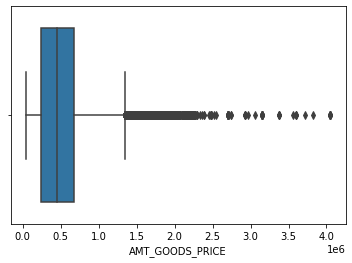

In [20]:
#Check if AMT_GOODS_PRICE have any outlier or not
sns.boxplot(appData.AMT_GOODS_PRICE)
plt.show()

3. EXT_SOURCE_2 Variable

In [21]:
#Missing values in "EXT_SOURCE_2" column
appData['EXT_SOURCE_2'].isnull().sum()

660

In [22]:
#Percentage of missing values in "EXT_SOURCE_2" column
100*(appData['EXT_SOURCE_2'].isnull().sum()/appData.shape[0])

0.21462646864665005

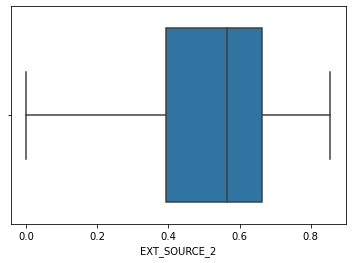

In [23]:
#Check if EXT_SOURCE_2 have any outlier or not
sns.boxplot(appData.EXT_SOURCE_2)
plt.show()

In [24]:
appData.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

4. OCCUPATION_TYPE variable

In [25]:
#Missing values in "OCCUPATION_TYPE" column
appData['OCCUPATION_TYPE'].isnull().sum()

96391

In [26]:
#Percentage of missing values in "OCCUPATION_TYPE" column
100*(appData['OCCUPATION_TYPE'].isnull().sum()/appData.shape[0])

31.345545362604916

In [27]:
#percentage of each OCCUPATION_TYPE in the data.
appData.OCCUPATION_TYPE.value_counts(normalize= True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [28]:
#find the mode of OCCUPATION_TYPE in appData,i.e. which category is most repeated
appData.OCCUPATION_TYPE.mode()[0]

'Laborers'

5. EXT_SOURCE_3 Variable

In [29]:
appData['EXT_SOURCE_3'].isnull().sum()

60965

In [30]:
#Percentage of missing values in "EXT_SOURCE_3" column
100*(appData['EXT_SOURCE_3'].isnull().sum()/appData.shape[0])

19.825307062186393

In [31]:
appData['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

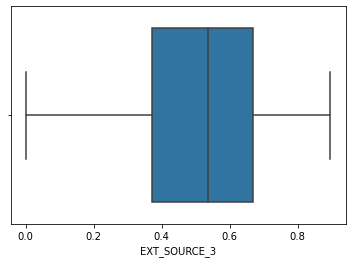

In [32]:
sns.boxplot(appData['EXT_SOURCE_3'])
plt.show()

In [33]:
#change negative value of days into years completed
appData[['AGE','YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH']]=appData[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].apply(lambda x: round(abs(x)/365,1))
appData[['AGE','YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH']].head()

,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,25.9,1.7,10.0,5.8
1,45.9,3.3,3.2,0.8
2,52.2,0.6,11.7,6.9
3,52.1,8.3,26.9,6.7
4,54.6,8.3,11.8,9.5


### Filtering necessary columns , used for further analysis

In [74]:
appData_updated=appData[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL',
'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_CHILDREN','YEARS_EMPLOYED',
 'OCCUPATION_TYPE','CNT_FAM_MEMBERS','ORGANIZATION_TYPE','REGION_RATING_CLIENT','EXT_SOURCE_2','REGION_RATING_CLIENT_W_CITY']]

In [75]:
appData_updated.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_CHILDREN,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,REGION_RATING_CLIENT,EXT_SOURCE_2,REGION_RATING_CLIENT_W_CITY
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,0,1.7,Laborers,1.0,Business Entity Type 3,2,0.262949,2
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,0,3.3,Core staff,2.0,School,1,0.622246,1
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,0,0.6,Laborers,1.0,Government,2,0.555912,2
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,0,8.3,Laborers,2.0,Business Entity Type 3,2,0.650442,2
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,0,8.3,Core staff,1.0,Religion,2,0.322738,2


In [76]:
appData_updated.shape

(307511, 27)

After filtering, there are now 307511 rows and 27 columns for further analysis.

#  Checking Data Types

In [77]:
# Checking the number of unique values is a column
# Number of unique values <=60: Categorical column
# If the number of unique values in a columns> 60: Continuous/Numerical Value
appData_updated.nunique().sort_values()

TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REGION_RATING_CLIENT_W_CITY         3
CODE_GENDER                         3
REGION_RATING_CLIENT                3
NAME_EDUCATION_TYPE                 5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
ORGANIZATION_TYPE                  58
YEARS_EMPLOYED                    465
AMT_GOODS_PRICE                  1002
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
DAYS_ID_PUBLISH                  6168
DAYS_EMPLOYED                   12574
AMT_ANNUITY                     13672
DAYS_REGISTRATION               15688
DAYS_BIRTH                      17460
EXT_SOURCE_2                   119831
SK_ID_CURR  

###### Changing neagative values to positive

In [78]:
#changing negative ages to positive ages.
appData_updated['DAYS_BIRTH']=abs(appData_updated['DAYS_BIRTH'])
appData_updated['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [79]:
#changing negative values in employed days to positive days
appData_updated['DAYS_EMPLOYED']=abs(appData_updated['DAYS_EMPLOYED'])
appData_updated['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [80]:
#changing negative registeration days to positive days.
appData_updated['DAYS_REGISTRATION']=abs(appData_updated['DAYS_REGISTRATION'])
appData_updated['DAYS_REGISTRATION'].describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [81]:
#changing negative publish days to positive ones
appData_updated['DAYS_ID_PUBLISH']=abs(appData_updated['DAYS_ID_PUBLISH'])
appData_updated['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [82]:
#Checking datatypes
appData_updated.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
CNT_CHILDREN                     int64
YEARS_EMPLOYED                 float64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
ORGANIZATION_TYPE               object
REGION_RATING_CLIENT             int64
EXT_SOURCE_2             

# Handling Outliers

1. Checking outliers for AMT_INCOME_TOTAL variable

In [60]:
appData_updated['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

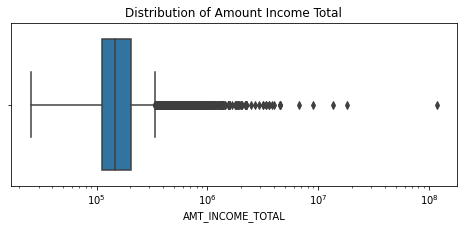

In [61]:
plt.figure(figsize=(8,3))
sns.boxplot(appData_updated.AMT_INCOME_TOTAL)
plt.title('Distribution of Amount Income Total')
plt.xscale('log')
plt.show()

In [62]:
appData_updated.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9,0.95,0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

2. Checking outliers for AMT_ANNUITY variable

In [63]:
appData_updated['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

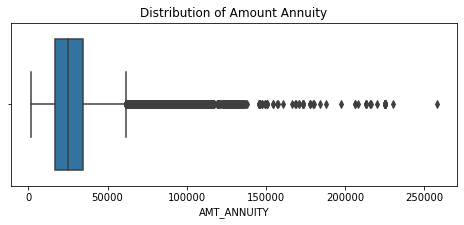

In [64]:
plt.figure(figsize=(8,3))
sns.boxplot(appData_updated.AMT_ANNUITY)
plt.title('Distribution of Amount Annuity')
plt.show()

3. Checking outliers for AMT_CREDIT variable

In [65]:
appData_updated['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

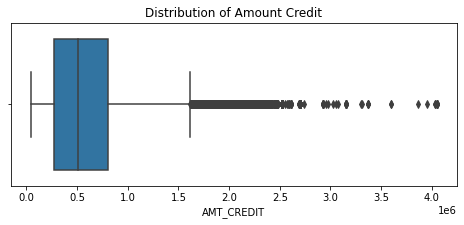

In [66]:
plt.figure(figsize=(8,3))
sns.boxplot(appData_updated.AMT_CREDIT)
plt.title('Distribution of Amount Credit')
plt.show()

In [67]:
appData_updated.AMT_CREDIT.quantile([0.5, 0.7, 0.9,0.95,0.99])

0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

4. Checking outliers for DAYS_EMPLOYED variable

In [68]:
appData_updated['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

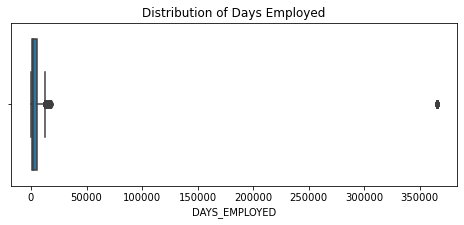

In [69]:
plt.figure(figsize=(8,3))
sns.boxplot(appData_updated.DAYS_EMPLOYED)
plt.title('Distribution of Days Employed')
plt.show()

5. Checking outliers for DAYS_REGISTRATION variable

In [70]:
appData_updated['DAYS_REGISTRATION'].describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

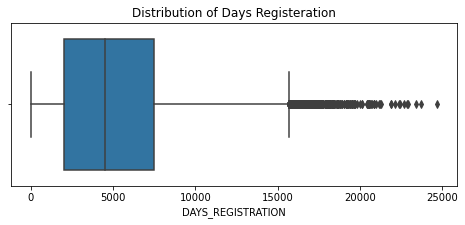

In [71]:
plt.figure(figsize=(8,3))
sns.boxplot(appData_updated.DAYS_REGISTRATION)
plt.title('Distribution of Days Registeration')
plt.show()

6. Checking outliers for EXT_SOURCE_2 variable

In [72]:
appData_updated['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

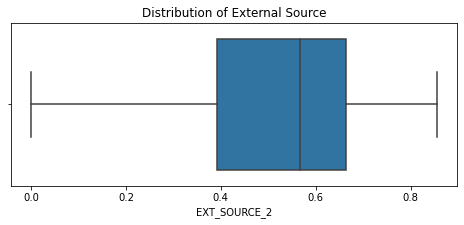

In [73]:
plt.figure(figsize=(8,3))
sns.boxplot(appData_updated.EXT_SOURCE_2)
plt.title('Distribution of External Source')
plt.show()

7. Checking outliers for DAYS_BIRTH variable

In [74]:
appData_updated['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

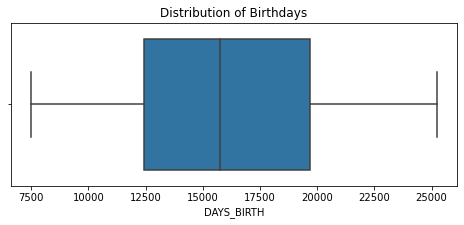

In [75]:
plt.figure(figsize=(8,3))
sns.boxplot(appData_updated.DAYS_BIRTH)
plt.title('Distribution of Birthdays')
plt.show()

# Binning

In [83]:
#INCOME wise binning
appData_updated['AMT_INCOME_TOTAL'].quantile([0,.2,.5,.7,.9,1])

0.0        25650.0
0.2        99000.0
0.5       147150.0
0.7       180000.0
0.9       270000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [84]:
appData_updated['INCOME_GROUP']=pd.qcut(appData_updated['AMT_INCOME_TOTAL'],q=[0,.2,.5,.7,.9,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])
appData_updated['INCOME_GROUP'].value_counts()

Low         90089
High        64766
VeryLow     63671
Medium      61824
VeryHigh    27161
Name: INCOME_GROUP, dtype: int64

In [85]:
# AGE  wise binning
appData_updated['AGE_RANGE']=pd.cut(appData_updated['DAYS_BIRTH'],[0,7300,10950,14600,18250,21900,365243],labels=['0-20','20-30','30-40','40-50','50-60','above 60'])

In [86]:
#CFEDIT wise binning
appData_updated['AMT_CREDIT'].quantile([0,.2,.5,.7,.9,1])
appData_updated['CREDIT_GROUP']=pd.qcut(appData_updated['AMT_CREDIT'],q=[0,.2,.5,.7,.9,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])
appData_updated['CREDIT_GROUP'].value_counts()

Low         88924
VeryLow     64925
Medium      64792
High        58277
VeryHigh    30593
Name: CREDIT_GROUP, dtype: int64

In [87]:
# LOAN YEAR OF SPAN (AMT_CREDIT/AMT_ANNUITY)
appData_updated['LOAN_TENURE'] = round(appData_updated['AMT_CREDIT']/appData_updated['AMT_ANNUITY'],2)
appData_updated['LOAN_TENURE'].quantile([0,.2,.5,.7,.9,1])
appData_updated['LOAN_TENURE_GROUP']=pd.qcut(appData_updated['LOAN_TENURE'],q=[0,.2,.5,.7,.9,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])
appData_updated['LOAN_TENURE_GROUP'].value_counts()

Low         95567
High        63346
VeryLow     61544
Medium      58389
VeryHigh    28653
Name: LOAN_TENURE_GROUP, dtype: int64

In [88]:
#CREDIT TO INCOME ratio
appData_updated['CREDIT_INCOME_RATIO'] = round(appData_updated['AMT_CREDIT']/appData_updated['AMT_INCOME_TOTAL'],0)

In [89]:
# Dropping the Gender = XNA from the data set as there is not enough data regarding XNA
appData_updated = appData_updated[appData_updated['CODE_GENDER']!='XNA']
appData_updated['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [90]:
#Checking dataframe after binning several columns
appData_updated.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_CHILDREN,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,REGION_RATING_CLIENT,EXT_SOURCE_2,REGION_RATING_CLIENT_W_CITY,INCOME_GROUP,AGE_RANGE,CREDIT_GROUP,LOAN_TENURE,LOAN_TENURE_GROUP,CREDIT_INCOME_RATIO
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,2120,0,1.7,Laborers,1.0,Business Entity Type 3,2,0.262949,2,High,20-30,Low,16.46,Low,2.0
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,0,3.3,Core staff,2.0,School,1,0.622246,1,High,40-50,VeryHigh,36.23,VeryHigh,5.0
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,2531,0,0.6,Laborers,1.0,Government,2,0.555912,2,VeryLow,50-60,VeryLow,20.00,Low,2.0
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833.0,2437,0,8.3,Laborers,2.0,Business Entity Type 3,2,0.650442,2,Low,50-60,Low,10.53,VeryLow,2.0
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311.0,3458,0,8.3,Core staff,1.0,Religion,2,0.322738,2,Low,50-60,Low,23.46,Medium,4.0


# Analysis

Checking for imabalance

In [154]:
appData_updated['TARGET'].value_counts()

0    282682
1     24825
Name: TARGET, dtype: int64

In [155]:
#Checking the imabalance percentage
round(appData_updated['TARGET'].value_counts(normalize=True)*100,2)

0    91.93
1     8.07
Name: TARGET, dtype: float64

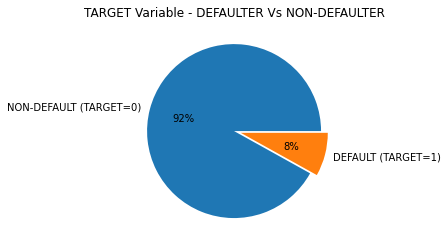

In [156]:
#Pictorial Respresntation
plt.pie(appData_updated['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.08),autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs NON-DEFAULTER')
plt.show()

Dividing data into two sets

In [157]:
appData_updated=appData_updated[appData_updated.CODE_GENDER!='XNA']  #can be removed before analysing as GENDER TYPE=XNA, doesn't make much sense.
NonDefaulter_df=appData_updated[appData_updated['TARGET']==0]
Defaulter_df=appData_updated[appData_updated['TARGET']==1]

In [158]:
#data having target value as 0
NonDefaulter_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_CHILDREN,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,REGION_RATING_CLIENT,EXT_SOURCE_2,INCOME_GROUP,AGE_RANGE,CREDIT_GROUP,LOAN_TENURE,LOAN_TENURE_GROUP,CREDIT_INCOME_RATIO
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,0,3.3,Core staff,2.0,School,1,0.622246,High,40-50,VeryHigh,36.23,VeryHigh,5.0
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,2531,0,0.6,Laborers,1.0,Government,2,0.555912,VeryLow,50-60,VeryLow,20.00,Low,2.0
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833.0,2437,0,8.3,Laborers,2.0,Business Entity Type 3,2,0.650442,Low,50-60,Low,10.53,VeryLow,2.0
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311.0,3458,0,8.3,Core staff,1.0,Religion,2,0.322738,Low,50-60,Low,23.46,Medium,4.0
5,100008,0,Cash loans,M,N,Y,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,16941,1588,4970.0,477,0,4.4,Laborers,2.0,Other,2,0.354225,VeryLow,40-50,Low,17.82,Low,5.0


In [140]:
#data having target value as 1
Defaulter_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_CHILDREN,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,REGION_RATING_CLIENT,EXT_SOURCE_2
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,2120,0,1.7,Laborers,1.0,Business Entity Type 3,2,0.262949
26,100031,1,Cash loans,F,N,Y,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,18724,2628,6573.0,1827,0,7.2,Cooking staff,1.0,Business Entity Type 3,3,0.548477
40,100047,1,Cash loans,M,N,Y,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,17482,1262,1182.0,1029,0,3.5,Laborers,2.0,Business Entity Type 3,2,0.306841
42,100049,1,Cash loans,F,N,N,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,13384,3597,45.0,4409,0,9.9,Sales staff,2.0,Self-employed,3,0.674203
81,100096,1,Cash loans,F,N,Y,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,24794,365243,5391.0,4199,0,1000.7,NaN,2.0,XNA,2,0.023952


#### Univariate Analysis for Categorical Variable for target 0 and target 1

OCCUPATION TYPE

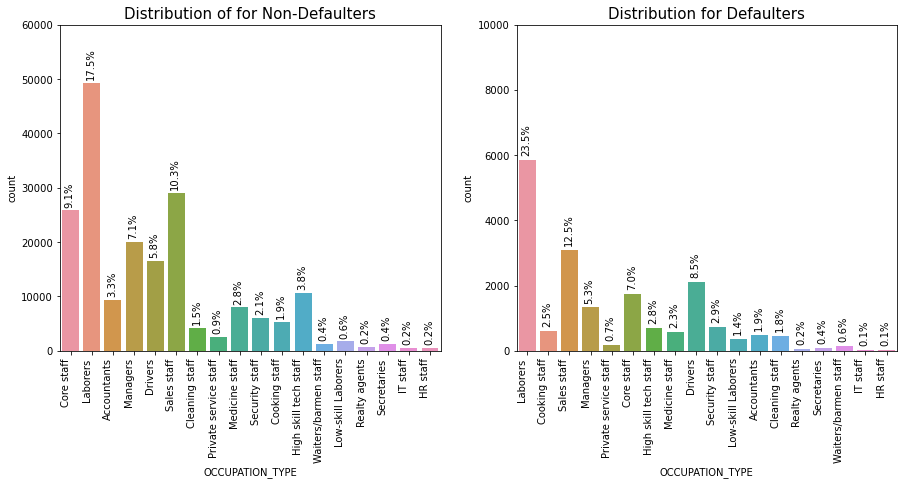

In [91]:
# Categorical variable analysis for NonDefaulter_df & Defaulter_df dataframe


fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
#subplot 1
sns.countplot(NonDefaulter_df['OCCUPATION_TYPE'],ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
ax1.set_title(f'Distribution of for Non-Defaulters',fontsize=15)
total = len(NonDefaulter_df)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 1000
    ax1.annotate(percentage, (x, y),ha='center' ,rotation=90)
ax1.set_ylim([0,60000])

# subplot 2
sns.countplot(Defaulter_df['OCCUPATION_TYPE'],ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")
ax2.set_title(f'Distribution for Defaulters',fontsize=15)
total = len(Defaulter_df)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() /2 - 0.05
    y = p.get_y() + p.get_height() + 200
    ax2.annotate(percentage, (x, y),ha='center',rotation=90)
ax2.set_ylim([0,10000])


plt.show()


In [96]:
#Defining functon for plotting same type of graph for further analysis for different columns

def plotCategorical(columnName):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
    #subplot 1
    sns.countplot(NonDefaulter_df[columnName],ax=ax1)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
    ax1.set_title(f'Distribution of {columnName} for Non-Defaulters',fontsize=15)
    total = len(NonDefaulter_df)
    for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height() + 1000
        ax1.annotate(percentage, (x, y),ha='center')

    # subplot 2
    sns.countplot(Defaulter_df[columnName],ax=ax2)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")
    ax2.set_title(f'Distribution of {columnName} for Defaulters',fontsize=15)
    total = len(Defaulter_df)
    for p in ax2.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() /2 - 0.05
        y = p.get_y() + p.get_height() + 200
        ax2.annotate(percentage, (x, y),ha='center')

    plt.show()


NAME_INCOME_TYPE

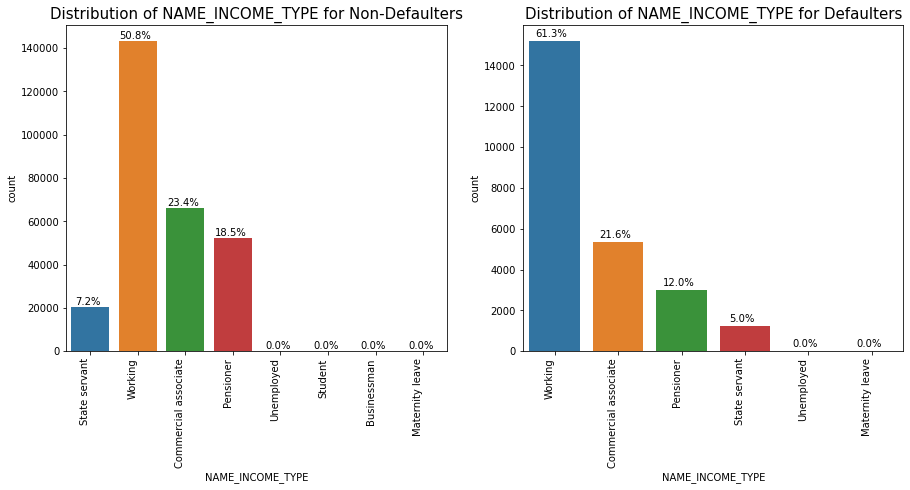

In [97]:
plotCategorical('NAME_INCOME_TYPE')

INCOME GROUP

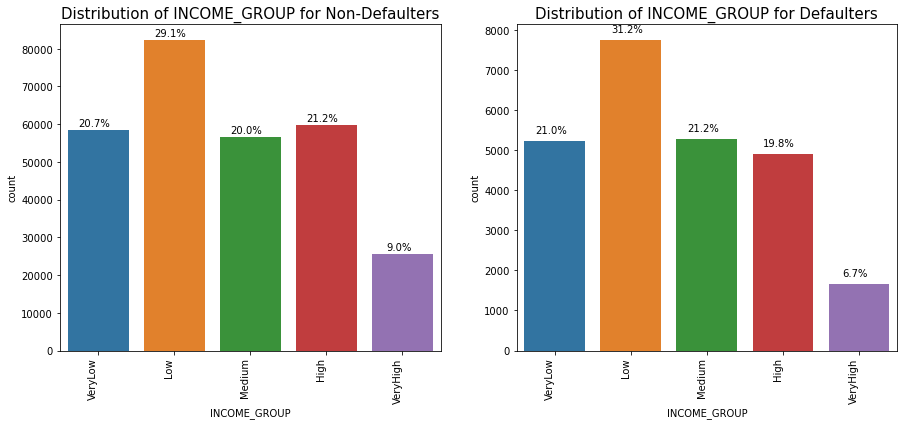

In [98]:
plotCategorical('INCOME_GROUP')

LOAN TENURE GROUP

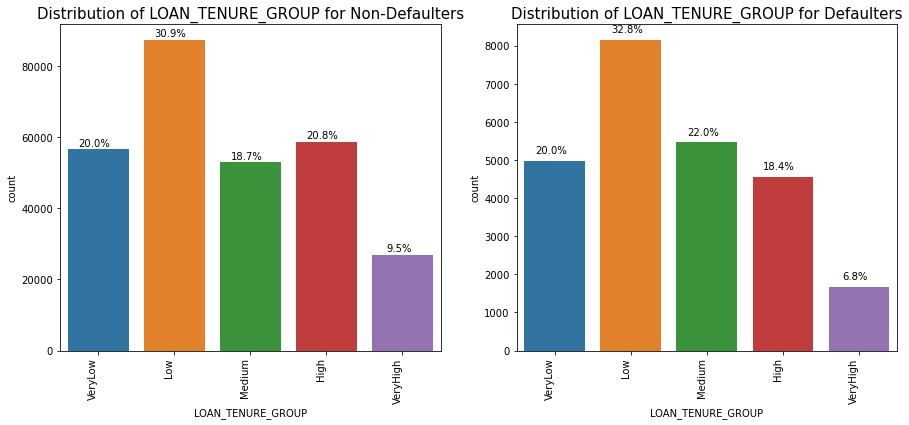

In [99]:
plotCategorical('LOAN_TENURE_GROUP')

NAME_EDUCATION_TYPE

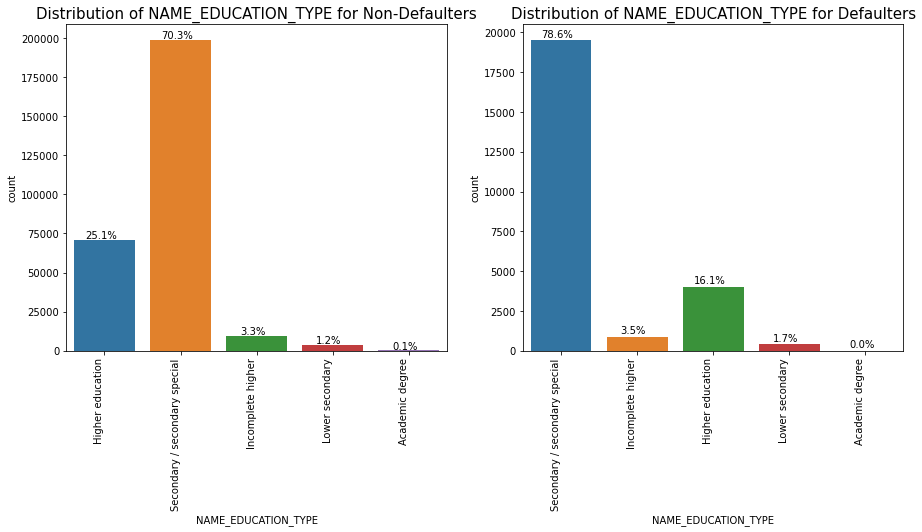

In [100]:
plotCategorical('NAME_EDUCATION_TYPE')

NAME_FAMILY_STATUS

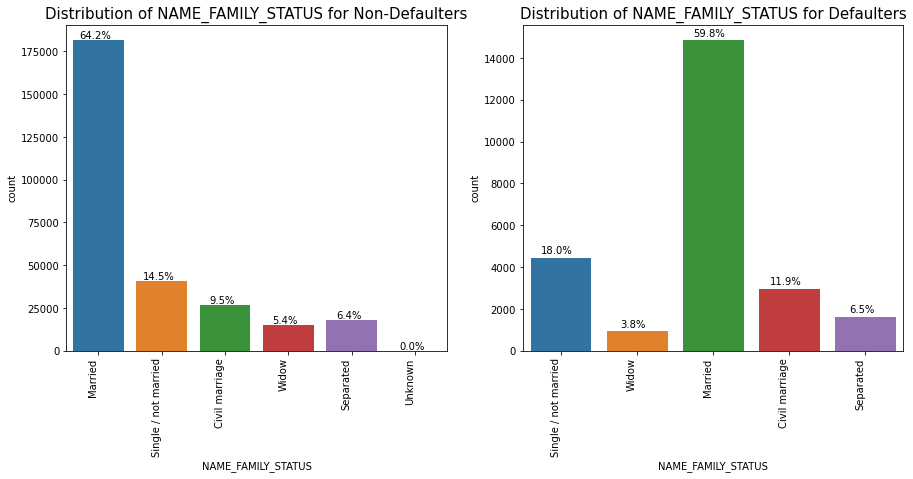

In [101]:
plotCategorical('NAME_FAMILY_STATUS')

NAME_HOUSING_TYPE

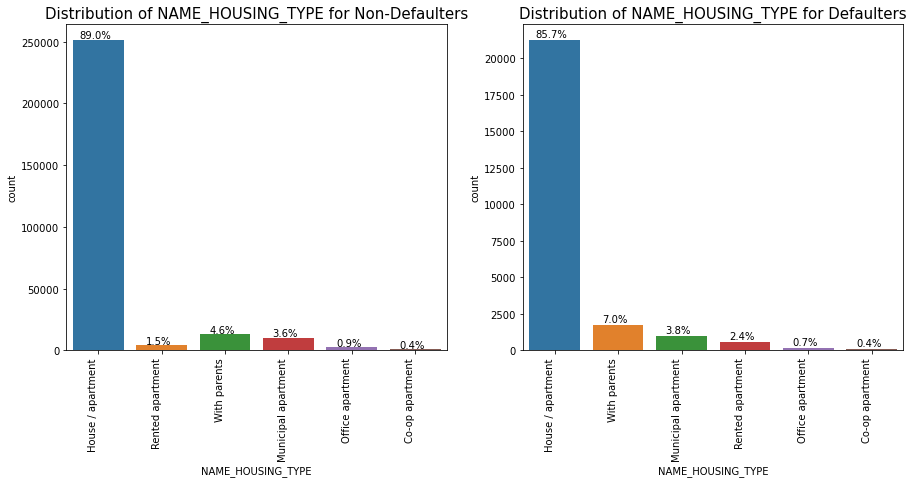

In [103]:
plotCategorical('NAME_HOUSING_TYPE')

CODE_GENDER

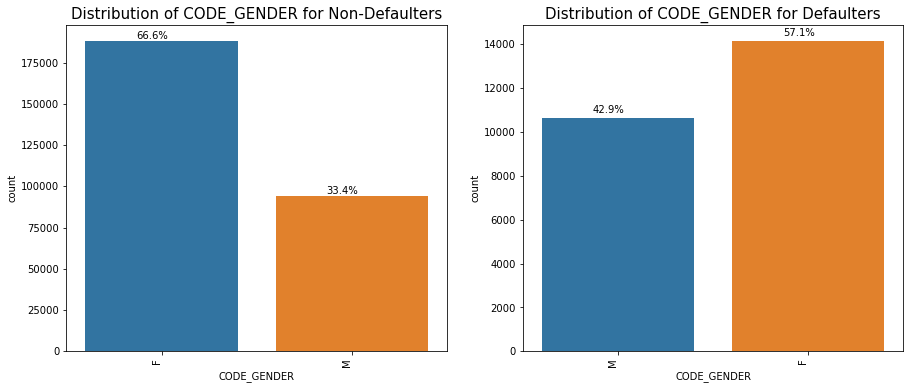

In [105]:
plotCategorical('CODE_GENDER')

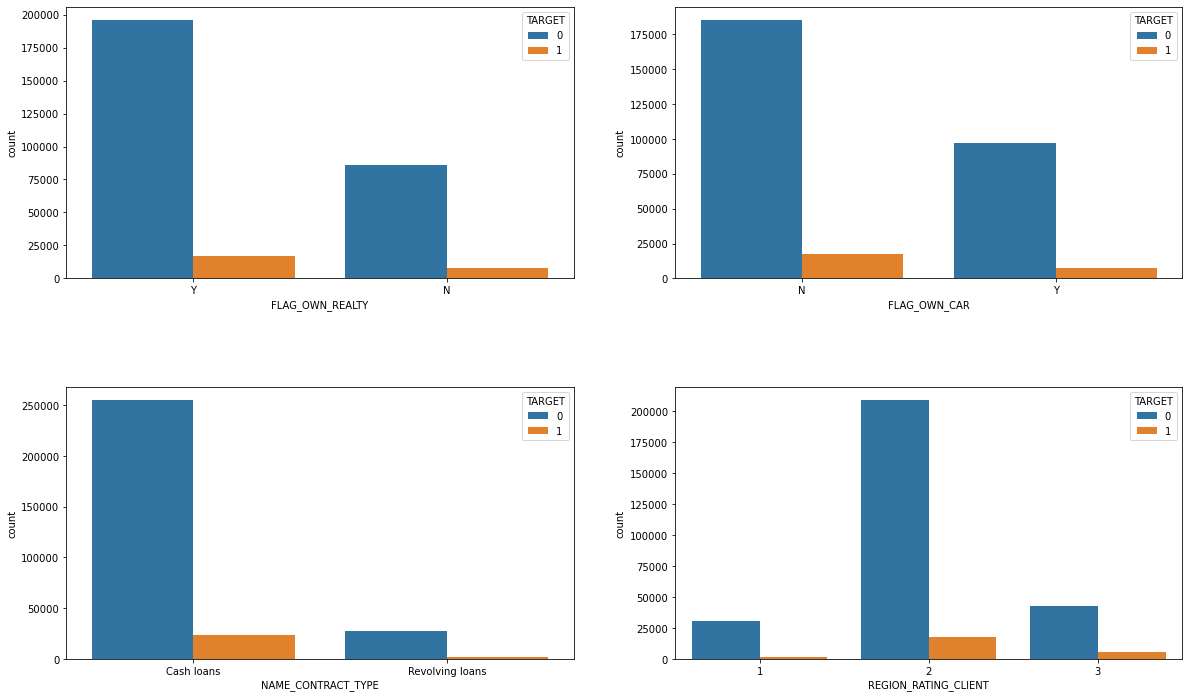

In [106]:
features = ['FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE','REGION_RATING_CLIENT']
plt.figure(figsize = (20, 40))

plt.subplots_adjust(hspace=0.4)
for i in enumerate(features):
    plt.subplot(6, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'TARGET', data = appData_updated)

#### Univariate Analysis for Numeric Variable for target 0 and target 1

Age

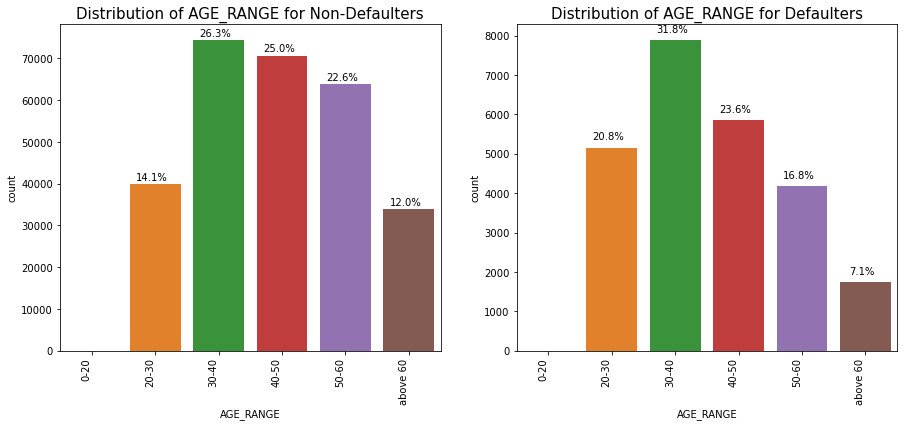

In [107]:
plotCategorical('AGE_RANGE')

AMT_CREDIT_RANGE

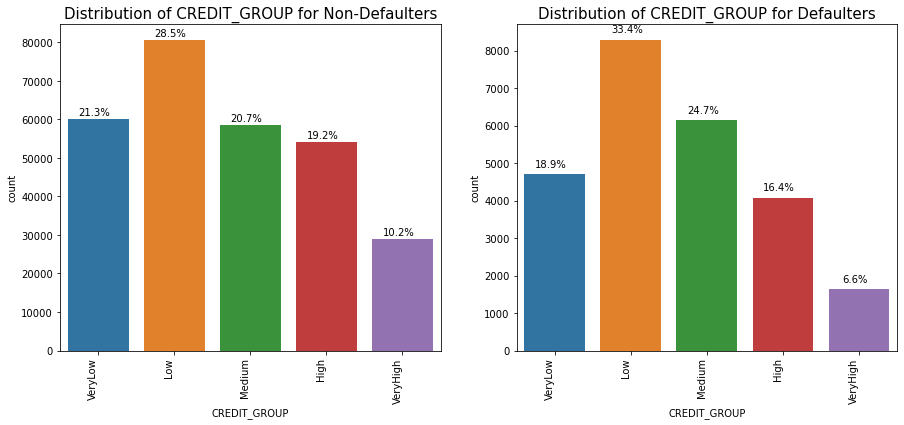

In [110]:
plotCategorical('CREDIT_GROUP')

In [112]:
#defining function for plotting graph for continous numerical values
def plotContinous(columnName):
    plt.figure(figsize=(15,5))

    plt.subplot(1, 2, 1)
    NonDefaulter_df[columnName].plot.hist(bins=range(10))
    plt.title('Distribution of CNT_FAM_MEMBERS for Non-Defaulters',fontsize=15)
    plt.xlabel('CNT_FAM_MEMBERS')
    plt.ylabel('LOAN APPLICATION COUNT')

    plt.subplot(1, 2, 2)
    Defaulter_df[columnName].plot.hist(bins=range(10))
    plt.title(f'Distribution of CNT_FAM_MEMBERS for Defaulters',fontsize=15)
    plt.xlabel('CNT_FAM_MEMBERS')
    plt.ylabel('LOAN APPLICATION COUNT')  

    plt.show()

Number of children

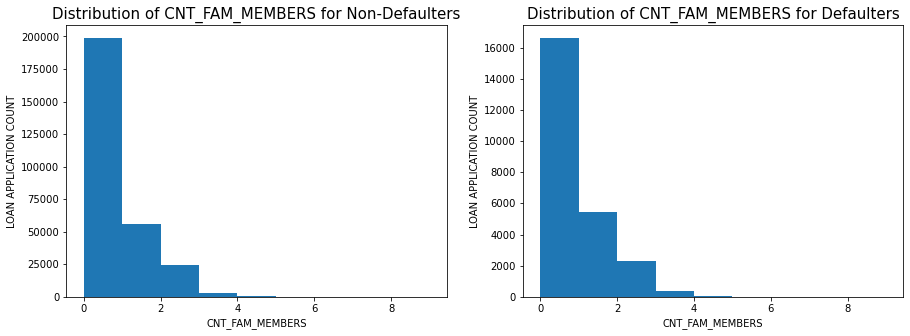

In [113]:
plotContinous('CNT_CHILDREN')

Count of Family Members

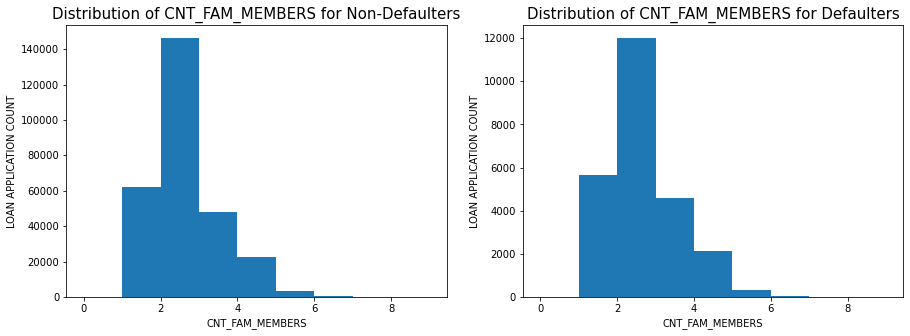

In [114]:
plotContinous('CNT_FAM_MEMBERS')

In [143]:
#defining function for plotting graph for continous numerical values
def uniConVariable(var):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    sns.distplot(a=NonDefaulter_df[var],ax=ax1)
    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
    sns.distplot(a=Defaulter_df[var],ax=ax2)
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)      
    plt.show()

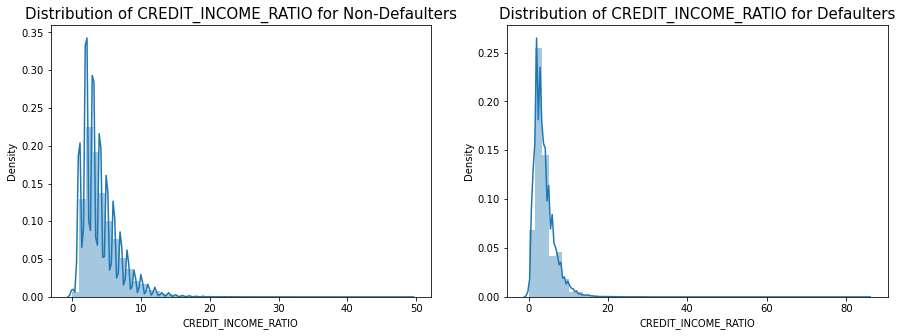

In [159]:
uniConVariable('CREDIT_INCOME_RATIO')

#### Correlation Analysis

In [164]:
def corrdf(df):
    #Crrelation in NonDefaulter data
    corrdf = df.corr()
    corrdf = corrdf.where(np.triu(np.ones(corrdf.shape),k=1).astype(np.bool)).unstack().reset_index()
    corrdf = corrdf.sort_values(by=0, ascending=False)
    return corrdf.head(10)

In [165]:
#Crrelation in Non Defaulter
corrNonDef_df = corrdf(NonDefaulter_df)
corrNonDef_df

,level_0,level_1,0
194,YEARS_EMPLOYED,DAYS_EMPLOYED,1.000000
88,AMT_GOODS_PRICE,AMT_CREDIT,0.987253
214,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878570
89,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
71,AMT_ANNUITY,AMT_CREDIT,0.771308
258,LOAN_TENURE,AMT_CREDIT,0.658363
275,CREDIT_INCOME_RATIO,AMT_CREDIT,0.648589
260,LOAN_TENURE,AMT_GOODS_PRICE,0.631326
277,CREDIT_INCOME_RATIO,AMT_GOODS_PRICE,0.628749
125,DAYS_EMPLOYED,DAYS_BIRTH,0.626116


In [166]:
#Crrelation in Defaulter data
corrNonDef_df= corrdf(Defaulter_df)
corrNonDef_df

,level_0,level_1,0
194,YEARS_EMPLOYED,DAYS_EMPLOYED,1.000000
88,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
214,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
89,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
71,AMT_ANNUITY,AMT_CREDIT,0.752195
258,LOAN_TENURE,AMT_CREDIT,0.668858
260,LOAN_TENURE,AMT_GOODS_PRICE,0.640633
275,CREDIT_INCOME_RATIO,AMT_CREDIT,0.639744
277,CREDIT_INCOME_RATIO,AMT_GOODS_PRICE,0.623163
125,DAYS_EMPLOYED,DAYS_BIRTH,0.582185


#### Bivariate Analysis for Categorical Variable for target 0 and target 1

##### Numeric-Numeric Analysis

In [167]:
#Scatter plot for numeric columns
def plotBivariate(column1,column2):
    plt.figure(figsize = (15, 8))
    plt.subplot(1,2,1)
    sns.scatterplot(NonDefaulter_df[column1],NonDefaulter_df[column2])
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.title(f'{column1}  vs  {column2} ')

    plt.subplot(1,2,2)
    sns.scatterplot(Defaulter_df[column1],Defaulter_df[column2])
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.title(f'{column1}  vs  {column2} ')


Income vs Credit

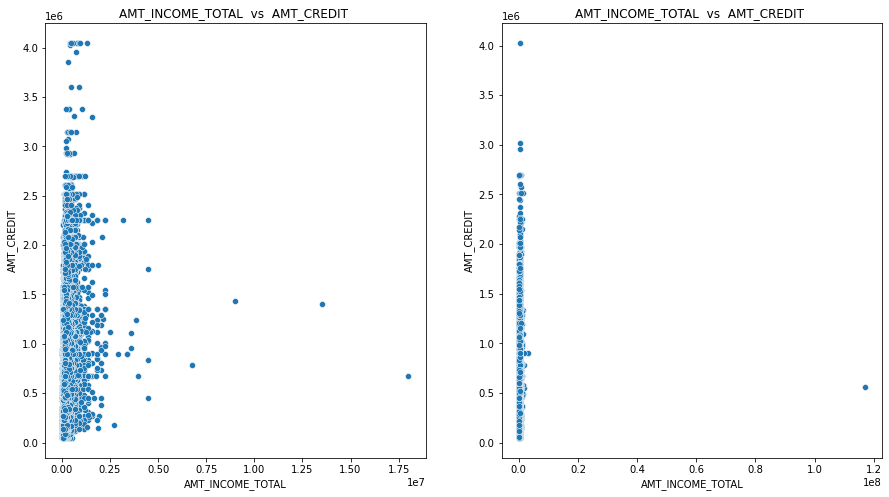

In [168]:
plotBivariate('AMT_INCOME_TOTAL','AMT_CREDIT')

GOODS_PRICE VS CREDIT

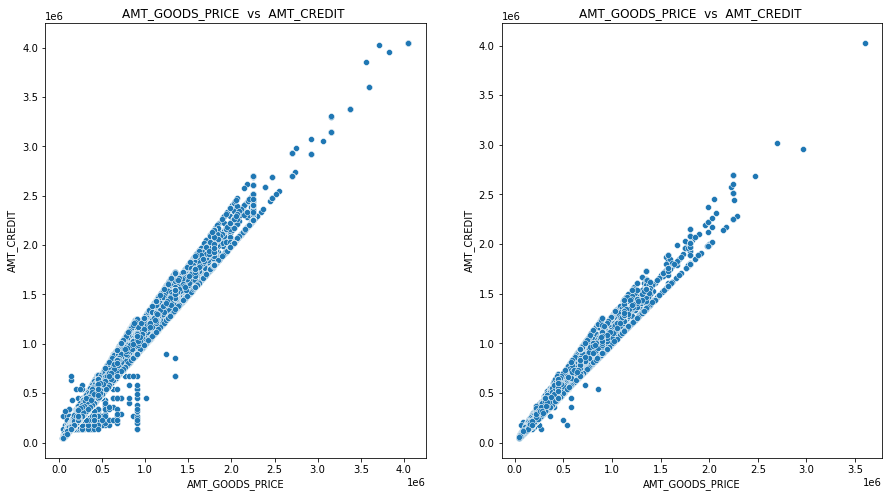

In [169]:
plotBivariate('AMT_GOODS_PRICE','AMT_CREDIT')

FAMILY MEMBERS VS CREDIT 

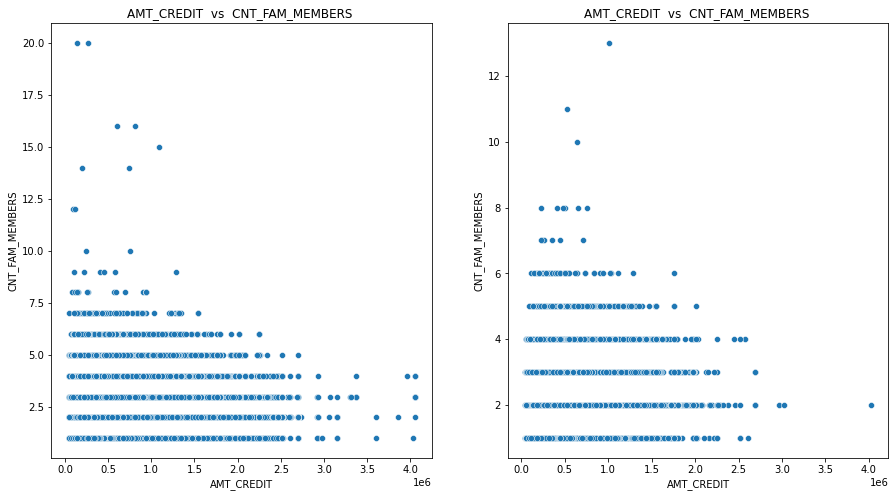

In [173]:
plotBivariate('AMT_CREDIT','CNT_FAM_MEMBERS')

##### Numeric-Categorical  Analysis

In [189]:
#function to plot categorical bivariate variable
def biCatVariable(var1,var2):
    plt.figure(figsize =(18,4))
    plt.subplot(1,2,1)
    ax = sns.countplot(data = NonDefaulter_df,x=var1,hue = var2)
    plt.ylabel('Count of People',fontdict={'color':'brown','fontsize' :12})
    plt.title(f'{var1} Vs {var2} Distribution of Non-Defaulter',fontdict={'color':'brown','fontsize' :14})
    plt.xticks(ha='right')
    for i in ax.patches:
        width = i.get_width()
        height = i.get_height()
        ax.text(width+i.get_x(),height,'{:1.2f}%'.format(height/len(NonDefaulter_df)*100))
    plt.subplot(1,2,2)
    ax = sns.countplot(data = Defaulter_df,x=var1,hue = var2)
    plt.ylabel('Count of People',fontdict={'color':'brown','fontsize' :12})
    plt.title(f'{var1} Vs {var2} Distribution of Defaulter',fontdict={'color':'brown','fontsize' :14})
    plt.xticks(ha='right')
    for i in ax.patches:
        width = i.get_width()
        height = i.get_height()
        ax.text(width+i.get_x(),height,'{:1.2f}%'.format(height/len(Defaulter_df)*100))

CODE_GENDER and NAME_CONTRACT_TYPE

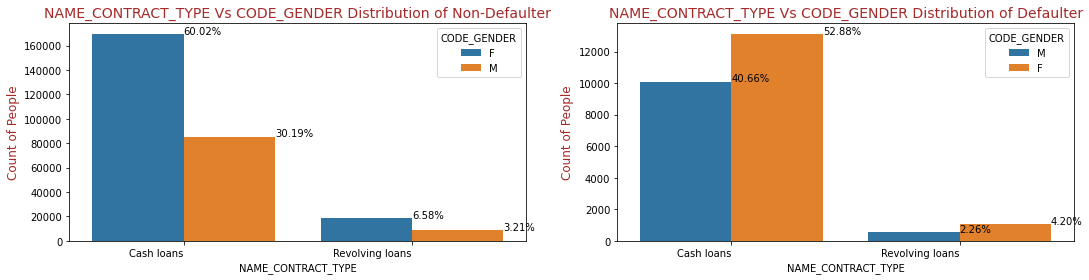

In [190]:
biCatVariable('NAME_CONTRACT_TYPE','CODE_GENDER')

FLAG_OWN_CAR and INCOME_GROUP

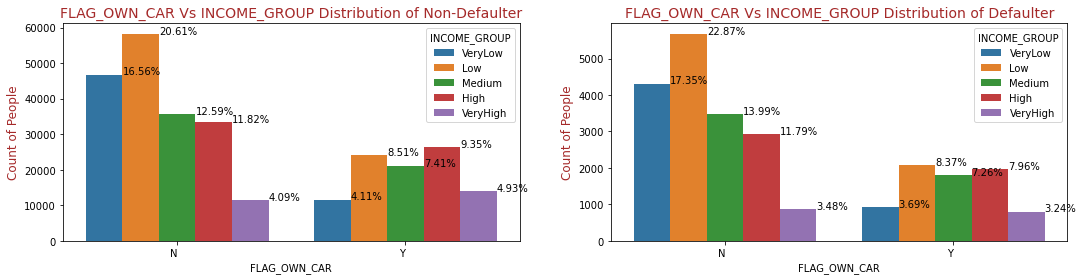

In [191]:
iCatVariable('FLAG_OWN_CAR','INCOME_GROUP')

### Reading the previous application

In [91]:
#Reading the data from file previous_application 
previous_data=pd.read_csv("previous_application.csv")
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# No. of rows and columns in the data
previous_data.shape

(1670214, 37)

In [93]:
# Summary of columns
previous_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [40]:
#Datatypes of all columns
previous_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

# Data Quality Check and Missing Values

In [41]:
#Null values in the dataframe
previous_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [42]:
# Finding percentage of missing values
round(100*(previous_data.isnull().sum()/previous_data.shape[0]),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

Here we can see, there are many columns who have missing % of more than 50 , but we are not dropping/imputing it as these 
missing values somehow depends on NAME_CONTRACT_STATUS variable.

In [43]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# XNA and XAP are replaced by NaN
previous_data=previous_data.replace('XNA', np.NaN)
previous_data=previous_data.replace('XAP', np.NaN)

In [45]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669868 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### TASK: Univariate Analysis

#### TASK: Categorical Univariate Analysis

In [46]:
# function for univariate analysis for previous data
def uniCatPrev(var):
    fig,ax = plt.subplots(1,1,figsize=(16,4))
    sns.countplot(x=var, data=previous_data,ax=ax)
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        h = p.get_height()
        w = p.get_width()
        ax.text(w+p.get_x(),h+4,'{:1.1f}%'.format(h*100/len(previous_data)),ha = 'center')
    plt.show()

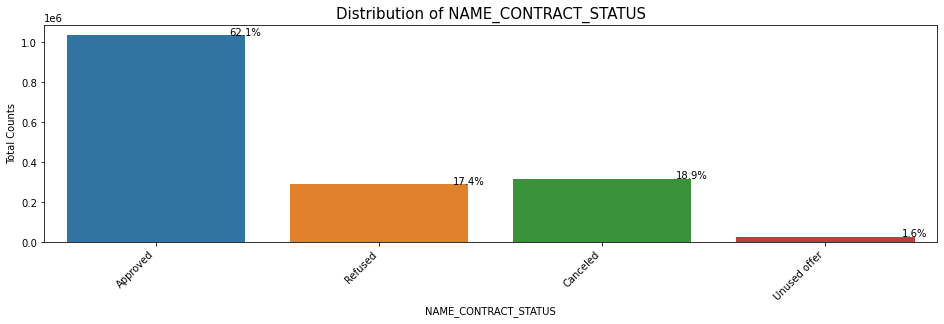

In [47]:
#check for NAME_CONTRACT_STATUS distribution 
uniCatPrev('NAME_CONTRACT_STATUS')

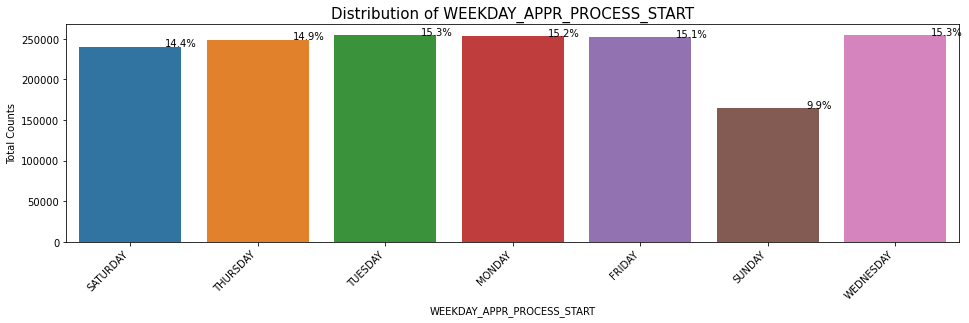

In [48]:
# check for WEEKDAY_APPR_PROCESS_START distribution
uniCatPrev('WEEKDAY_APPR_PROCESS_START')

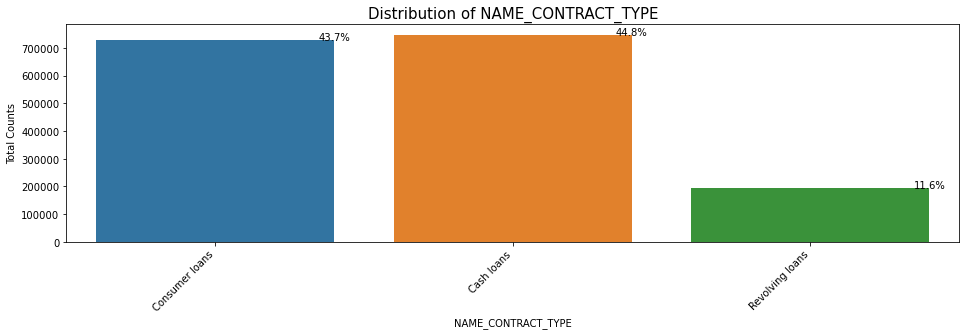

In [49]:
# NAME_CONTRACT_TYPE visvualization
uniCatPrev('NAME_CONTRACT_TYPE')

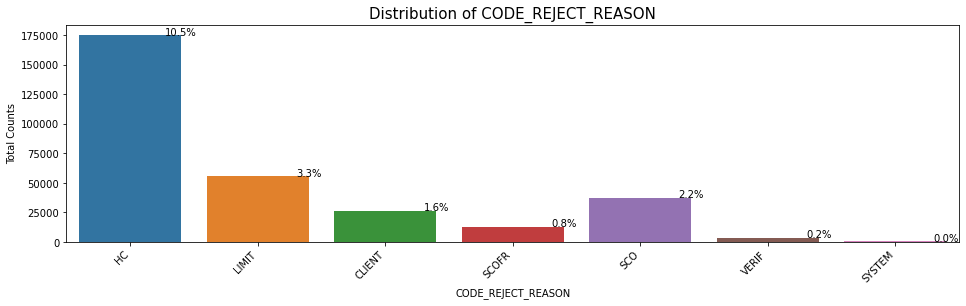

In [50]:
# Reason to reject loan
uniCatPrev('CODE_REJECT_REASON')

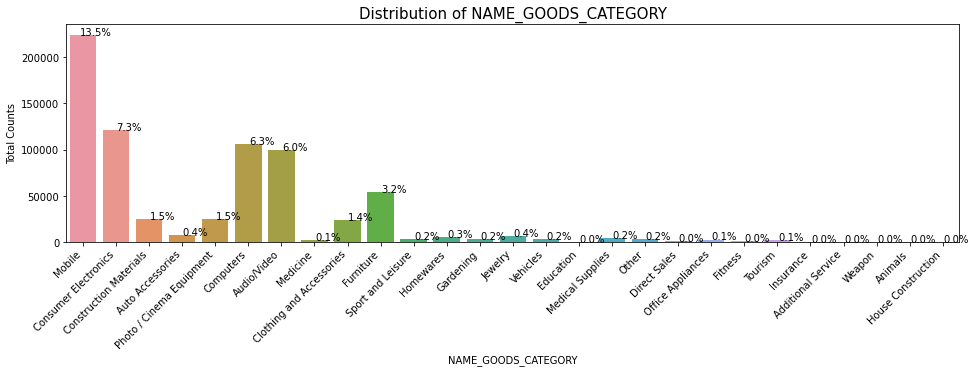

In [51]:
#Loan ofor which purpose
uniCatPrev('NAME_GOODS_CATEGORY')

In [52]:
#### TASK: Numerical Univariate Analysis

In [53]:
def uniConPerv(var):
    plt.figure(figsize=(10,4))
    sns.distplot(a=previous_data[var])
    plt.title(f'Distribution of {var} for Non-previous_data',fontsize=15)  
    plt.show()

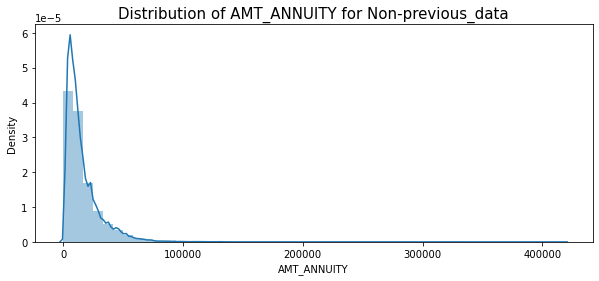

In [54]:
uniConPerv('AMT_ANNUITY')

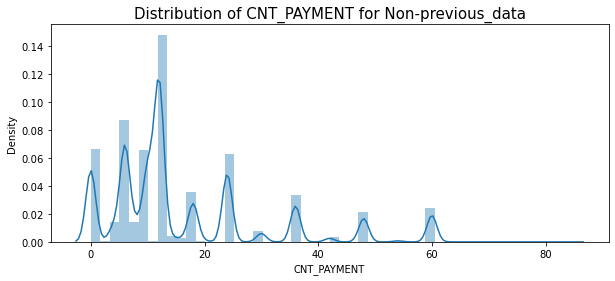

In [55]:
uniConPerv('CNT_PAYMENT')

#### TASK : BIVARIATE ANALYSIS

In [56]:
# function for bivariate analysis for previous data
def biCatPrev(df,var1,var2):
    fig,ax = plt.subplots(1,1,figsize=(8,4))
    sns.countplot(x=var1, data=df,hue = var2,ax=ax)
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var1} Vs {var2}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    for p in ax.patches:
        h = p.get_height()
        w = p.get_width()
        ax.text(w+p.get_x(),h+4,'{:1.1f}%'.format(h*100/len(df)),ha = 'center')
    plt.show()

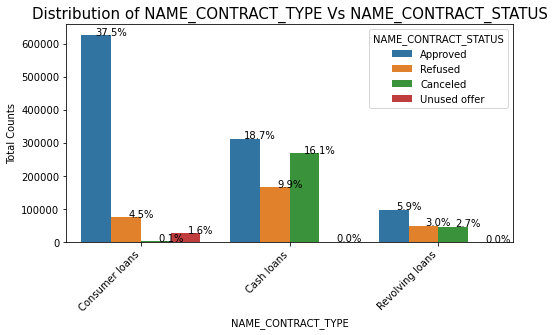

In [57]:
biCatPrev(previous_data,'NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS')

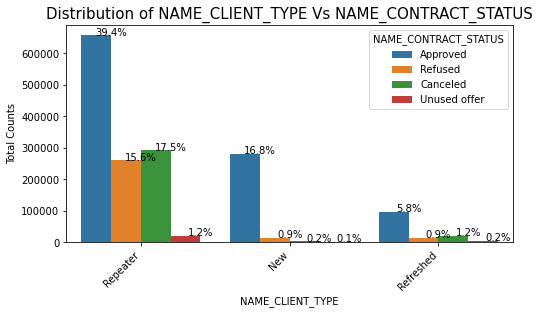

In [58]:
biCatPrev(previous_data,'NAME_CLIENT_TYPE','NAME_CONTRACT_STATUS')


#### Task bivariate continous analysis

In [59]:
def biNumPrev(var1,var2):
    plt.figure(figsize =(8,4))
    ax = sns.scatterplot(data = previous_data,x=var1,y = var2)
    plt.title(f'{var1} Vs {var2} Distribution of previous_data',fontdict={'color':'brown','fontsize' :14})

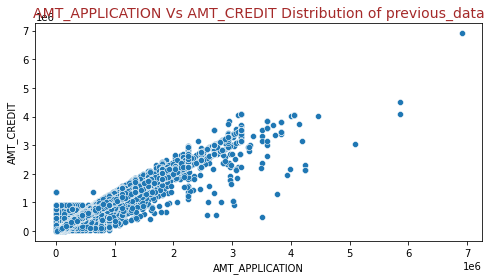

In [60]:
biNumPrev('AMT_APPLICATION','AMT_CREDIT')

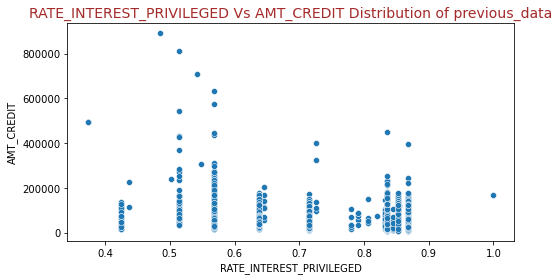

In [61]:
biNumPrev('RATE_INTEREST_PRIVILEGED','AMT_CREDIT')

In [62]:
#Crrelation in Previous data
corrPrev_df= corrdf(previous_data)
corrPrev_df

NameError: name 'corrdf' is not defined

### Task: Merging the dataset

In [94]:
# SK_ID_CURR is forigen key 
merge_df = pd.merge(appData_updated, previous_data, how='inner', on=['SK_ID_CURR'])
merge_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_CHILDREN,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,REGION_RATING_CLIENT,EXT_SOURCE_2,REGION_RATING_CLIENT_W_CITY,INCOME_GROUP,AGE_RANGE,CREDIT_GROUP,LOAN_TENURE,LOAN_TENURE_GROUP,CREDIT_INCOME_RATIO,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,2120,0,1.7,Laborers,1.0,Business Entity Type 3,2,0.262949,2,High,20-30,Low,16.46,Low,2.0,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,0,3.3,Core staff,2.0,School,1,0.622246,1,High,40-50,VeryHigh,36.23,VeryHigh,5.0,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,0,3.3,Core staff,2.0,School,1,0.622246,1,High,40-50,VeryHigh,36.23,VeryHigh,5.0,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,0,3.3,Core staff,2.0,School,1,0.622246,1,High,40-50,VeryHigh,36.23,VeryHigh,5.0,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,2531,0,0.6,Laborers,1.0,Government,2,0.555912,2,VeryLow,50-60,VeryLow,20.00,Low,2.0,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,Y,1,0.212008,NaN,NaN,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [95]:
merge_df.shape

(1413646, 69)

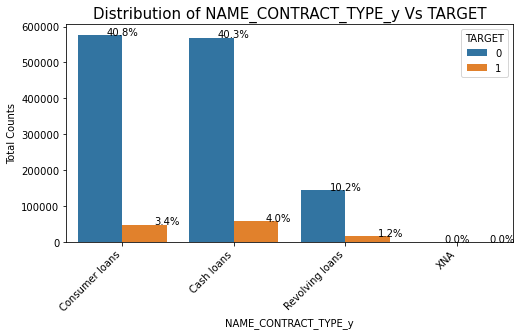

In [96]:
#lets do combined analysis
# On the basis of loan type defaulter - no defaulter pattern
biCatPrev(merge_df,'NAME_CONTRACT_TYPE_y','TARGET')

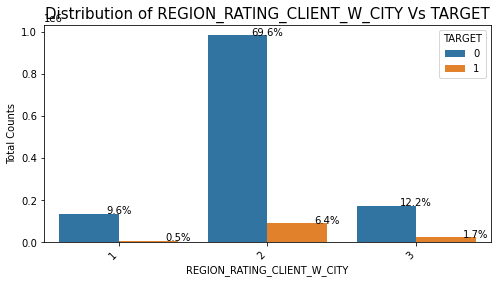

In [66]:
biCatPrev(merge_df,'REGION_RATING_CLIENT_W_CITY','TARGET')

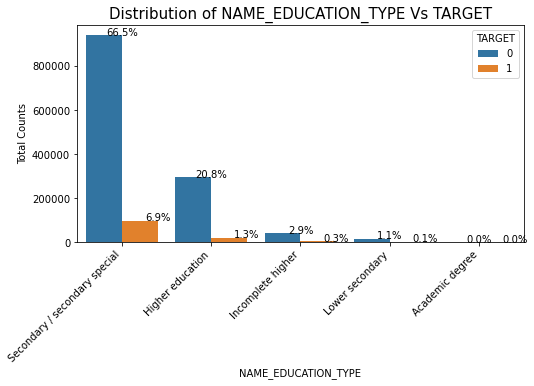

In [67]:
biCatPrev(merge_df,'NAME_EDUCATION_TYPE','TARGET')

In [116]:
def combinedPlot(df,var1,var2):
    df_table = pd.pivot_table(df, values='TARGET', index=[var1],columns=[var2], aggfunc=np.mean)
    ax = df_table.T.plot(kind='bar')
    ylab = ax.set_ylabel('% of Defaulter')
    plt.title(f'% of Defaulter for {var1} and {var2}', fontdict={'fontsize':20})
    plt.legend(bbox_to_anchor=(1.5,0.8))
    plt.show()

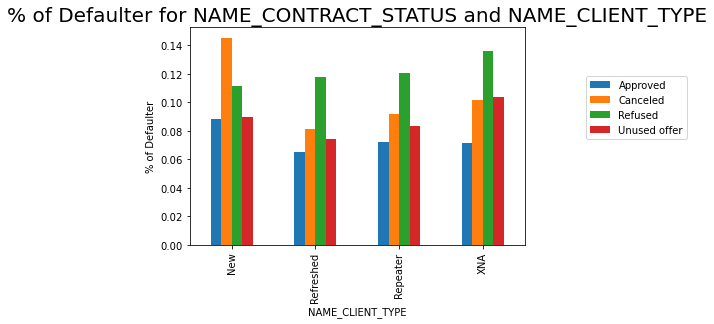

In [117]:
# % of Defaulter for NAME_CONTRACT_STATUS and NAME_CLIENT_TYPE
combinedPlot(merge_df,'NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE')

In [120]:
# from the above graph that Client who where 'New' 
# and had 'Cancelled' previous application tend to have more % of Loan-Payment defaulter in current application                 

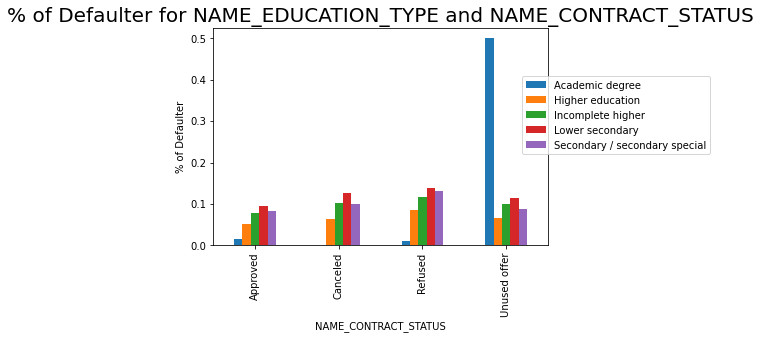

In [121]:
#% of Defaulter for NAME_CONTRACT_STATUS and NAME_EDUCATION_TYPE
combinedPlot(merge_df,'NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')

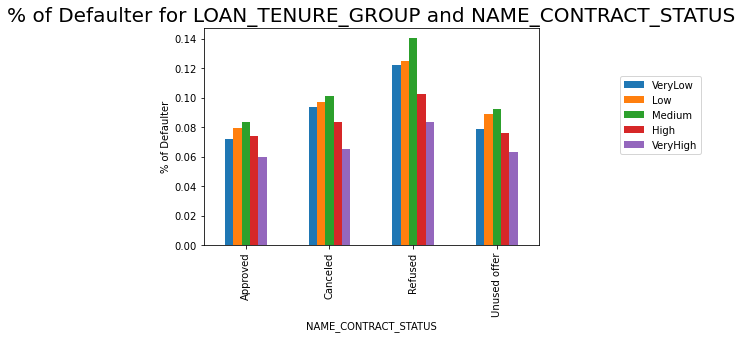

In [122]:
#% of Defaulter for NAME_CONTRACT_STATUS and LOAN_TENURE_GROUP
combinedPlot(merge_df,'LOAN_TENURE_GROUP','NAME_CONTRACT_STATUS')

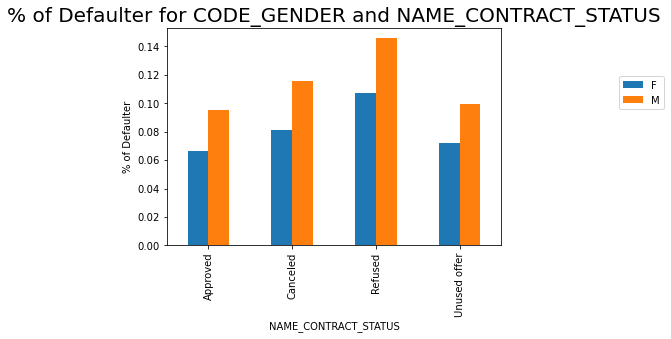

In [123]:
#% of Defaulter for NAME_CONTRACT_STATUS and CODE_GENDER
combinedPlot(merge_df,'CODE_GENDER','NAME_CONTRACT_STATUS')

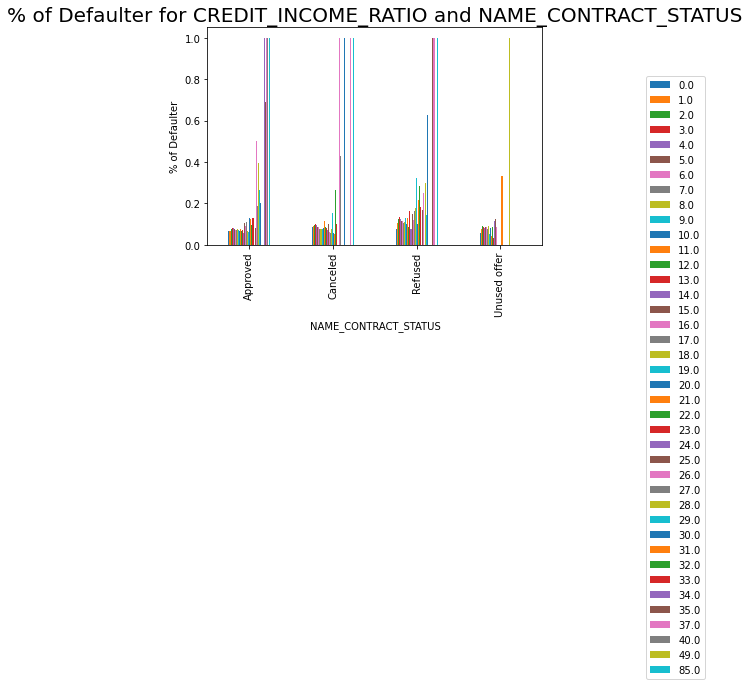

In [124]:
#credit_income_ratio_df
df_table = pd.pivot_table(merge_df, values='TARGET', index='CREDIT_INCOME_RATIO',columns='NAME_CONTRACT_STATUS', aggfunc=np.mean)
combinedPlot(merge_df,'CREDIT_INCOME_RATIO','NAME_CONTRACT_STATUS')

### INSIGHTS:

1. People having Lower Secondary education are very less and it also has maximum % of payment difficulties- around 12%. Hence, client with education type as ‘Lower Secondary’ are the driving factors for Loan Defaulters.

2. In appliation data study we see Female are most who were likely to apply and get approval of loan but also it has counter parts that male are more likely to be defaulter that is around 9.5% .

3. People having CREDIT_INCOME_RATIO > 30% are driving factors for loan defaulter